# House Price Prediction

A US\-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house.

- How well those variables describe the price of a house.

The Metadata information for this database can be found in the following file [data\_description.txt](https://cdn.upgrad.com/UpGrad/temp/87f67e28-c47e-4725-ae3c-111142c7eaba/data_description.txt) 



## Data Analysis

The first step is to understand the data, looking for missing values, plotting some variables, outliers, dummy variables, analyzing correlation with target variable, which is price, etc.


In [3]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge,Lasso

pd.set_option('display.max_columns', None)

In [4]:
# Reading the data set

data = pd.read_csv('train.csv')
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
# Getting more information about the features like missing  values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Missing value for Electrical

data[data['Electrical'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1379  1380          80       RL         73.0     9735   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1379         Lvl    AllPub    Inside       Gtl       Timber       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1379       Norm     1Fam       SLvl            5            5       2006   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1379          2007     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1379         0.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1379           No          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1379        384          384    GasA        Gd          Y        NaN   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1379       754       640             0       1394             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1379         2         1             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1379             7        Typ           0         NaN    BuiltIn       2007.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1379          Fin           2         400         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1379         100            0              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1379         0    NaN   NaN         NaN        0       5    2008       WD   

     SaleCondition  SalePrice  
1379        Normal     167500

In [7]:
# Comparing Fireplace with FireplaceQu

data[data['Fireplaces']==0][['Fireplaces','FireplaceQu']]
# print(data[data['FireplaceQu'].isna()]['Fireplaces'].count())

Fireplaces FireplaceQu
0              0         NaN
5              0         NaN
10             0         NaN
12             0         NaN
15             0         NaN
...          ...         ...
1452           0         NaN
1453           0         NaN
1454           0         NaN
1458           0         NaN
1459           0         NaN

[690 rows x 2 columns]

In [8]:
# Basement analysis

# print(data[(data['BsmtExposure'].isna()) | (data['BsmtFinType2'].isna())][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']])
# print(data[(data['Id']==333) | (data['Id']==949)][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']])
data[(data['Id']==333) | (data['Id']==949)][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2
332       Gd       TA           No          GLQ          NaN
948       Gd       TA          NaN          Unf          Unf

In [9]:
# MSSubClass has some values that are not included in the dictionary

data['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [10]:
col_to_drop = []
for i in data:
    if data[i].value_counts().max()/len(data[i]) > 0.9:
        col_to_drop.append(i)
col_to_drop.append(['PoolQC','Alley','Fence','MiscFeature'])

After looking at the number of missing values and comparing with metadata file, the following conclusions raised:

- **Changes** :

> 1. MSSubClass will be change to categorical and values like 45 and 85 will be dropped because they do not fit any category.
> 2. ExterQual will be change to ordinal categorical.
> 3. ExterCond will be change to ordinal categorical.
> 4. FirePlaceQu null values will be changed to No Fireplace and then to ordinal categorical.
> 5. YearBuilt will be change to age.
> 6. GarageType null values will be changed to No Garage.
> 7. GarageYrBlt null values will be changed to number to maintain the variable as float and then to age of the construction.
> 8. GarageFinish null values will be changed to No Garage.
> 9. GarageQual null values will be changed to No Garage.
> 10. BsmtQual null values will be changed to No Basement and then to ordinal categorical.
> 11. BmstCond null values will be changed to No Basement and then to ordinal categorical.
> 12. BsmtExposure null values will be changed to No Basement and then to ordinal categorical.
> 13. BsmtFinType1 null values will be changed to No Basement and then to ordinal categorical.
> 14. BsmtFinType2 null values will be changed to No Basement and then to ordinal categorical.
> 15. HeatingQC will be change to ordinal categorical.
> 16. KitchenQual will be change to ordinal categorical.
> 17. Functional will be change to ordinal categorical.
> 18. GarageYrBlt change to age of the construction.
> 19. GarageFinish will be change to ordinal categorical.
> 20. GarageQual will be change to ordinal categorical.
> 21. PavedDrive will be change to ordinal categorical.
> 22. MoSold will be chane to categorical.
> 23. FYrSold will be change to age.

- **Drops** :

> 1. LotFrontage has 259 missing values, all those rows will be dropped.
> 2. Id is just the number of the row, then this column will be dropped.
> 3. MasVnrType and MasVnrArea have 8 values missing and they are the same rows, so these rows will be dropped.
> 4. Bsmt index = 332,948 will be drop because they are inconsistent. For 4 of 5 features related with Basement they have data, but in one of the features nan appeared which means no basement.
> 5. Alley will be drop because there is one category that is more than 90% of the values.
> 6. PoolQC will be drop because there is one category that is more than 90% of the values.
> 7. Fence will be drop because there is one category that is more than 90% of the values.
> 8. MiscFeature will be drop because there is one category that is more than 90% of the values.
> 9. Street will be drop because there is one category that is more than 90% of the values.
> 10. Utilities will be drop because there is one category that is more than 90% of the values.
> 11. LandSlope will be drop because there is one category that is more than 90% of the values.
> 12. KitchenAbvGr will be drop because there is one category that is more than 90% of the values.
> 13. Functional will be drop because there is one category that is more than 90% of the values.
> 14. GarageCond will be drop because there is one category that is more than 90% of the values.
> 15. PavedDrive will be drop because there is one category that is more than 90% of the values.
> 16. 3SsnPorch will be drop because there is one category that is more than 90% of the values.
> 17. ScreenPorch will be drop because there is one category that is more than 90% of the values.
> 18. PoolArea will be drop because there is one category that is more than 90% of the values.
> 19. MiscVal will be drop because there is one category that is more than 90% of the values.
> 20. Condition2 will be drop because there is one category that is more than 90% of the values.
> 21. RoofMatl will be drop because there is one category that is more than 90% of the values.
> 22. Heating will be drop because there is one category that is more than 90% of the values.
> 23. CentralAir will be drop because there is one category that is more than 90% of the values.
> 24. Electrical will be drop because there is one category that is more than 90% of the values.
> 25. LowQualFinSF will be drop because there is one category that is more than 90% of the values.
> 26. BsmtHalfBath will be drop because there is one category that is more than 90% of the values.



## Feature Engineering

After a deep analysis of the raw features, now it is time to proceed with feature engineering, by making the changes proposed in the previous summary. Also, dummy variables creation will be developed during this step.



In [11]:
# Dropping values

data.drop(data[data['LotFrontage'].isna()].index,axis=0,inplace=True)
data.drop('Id',axis=1,inplace=True)
data.drop(data[data['MasVnrType'].isna()].index,axis=0,inplace=True)
#data.drop(col_to_drop,axis=1,inplace=True)
for i in col_to_drop:
    data.drop(i,axis=1,inplace=True)

In [12]:
data.drop(data[data['MSSubClass']==45].index,axis=0,inplace=True)
data.drop(data[data['MSSubClass']==75].index,axis=0,inplace=True)
data.drop(data[data['MSSubClass']==85].index,axis=0,inplace=True)

In [13]:
# Changing NAN values

data['FireplaceQu'].fillna('No Fireplace',inplace=True)
data['GarageType'].fillna('No Garage',inplace=True)
data['GarageYrBlt'].fillna(1923,inplace=True)
data['GarageFinish'].fillna('No Garage',inplace=True)
data['GarageQual'].fillna('No Garage',inplace=True)
data['BsmtQual'].fillna('No Basement',inplace=True)
data['BsmtCond'].fillna('No Basement',inplace=True)
data['BsmtExposure'].fillna('No Basement',inplace=True)
data['BsmtFinType1'].fillna('No Basement',inplace=True)
data['BsmtFinType2'].fillna('No Basement',inplace=True)

In [14]:
# Changing categorical

ms_dic = { 20: "1-STORY_1946",30:"1-STORY_1945",40:"1-STORY_W/FINISHED_ATTIC",5:"1-1/2_STORY_UNFINISHED",50:"1-1/2_STORY_FINISHED",60:"2-STORY_1946",70:"2-STORY_1945",75:"2-1/2_STORY",80:"SPLIT_OR_MULTI-LEVEL",85:"SPLIT_FOYER",90:"DUPLEX",120:"1-STORY_PUD",150:"1-1/2_STORY_PUD",160:"2-STORY_PUD",180:"PUD-MULTILEVEL",190:"2_FAMILY_CONVERSION"}
rank_dic = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
fire_dic = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0}
bsmt_dic = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0}
bsmt_ex_dic = {'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0}
fin_dic = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0}
gar_dic = {'Fin':3,'RFn':2,'Unf':1,'No Garage':0}
gar2_dic = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0}

data['MSSubClass'] = data['MSSubClass'].apply(lambda x: ms_dic[x]) 
data['ExterQual'] = data['ExterQual'].apply(lambda x: rank_dic[x])
data['ExterCond'] = data['ExterCond'].apply(lambda x: rank_dic[x])
data['YearRemodAdd'] = 2023 - data['YearRemodAdd']
data['FireplaceQu'] = data['FireplaceQu'].apply(lambda x: fire_dic[x])
data['BsmtQual'] = data['BsmtQual'].apply(lambda x: bsmt_dic[x])
data['BsmtCond'] = data['BsmtCond'].apply(lambda x: bsmt_dic[x])
data['BsmtExposure'] = data['BsmtExposure'].apply(lambda x: bsmt_ex_dic[x])
data['BsmtFinType1'] = data['BsmtFinType1'].apply(lambda x: fin_dic[x])
data['BsmtFinType2'] = data['BsmtFinType2'].apply(lambda x: fin_dic[x])
data['KitchenQual'] = data['KitchenQual'].apply(lambda x: rank_dic[x])
data['GarageFinish'] = data['GarageFinish'].apply(lambda x: gar_dic[x])
data['GarageQual'] = data['GarageQual'].apply(lambda x: gar2_dic[x])
data['YearBuilt'] = 2023 -data['YearBuilt']
data['GarageYrBlt'] = 2023 - data['GarageYrBlt']
data['MoSold'] = data['MoSold'].apply(lambda x: str(i))
data['YrSold'] = 2023 - data['YrSold']

CentralAir



In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1154 non-null   object 
 1   MSZoning       1154 non-null   object 
 2   LotFrontage    1154 non-null   float64
 3   LotArea        1154 non-null   int64  
 4   LotShape       1154 non-null   object 
 5   LandContour    1154 non-null   object 
 6   LotConfig      1154 non-null   object 
 7   Neighborhood   1154 non-null   object 
 8   Condition1     1154 non-null   object 
 9   BldgType       1154 non-null   object 
 10  HouseStyle     1154 non-null   object 
 11  OverallQual    1154 non-null   int64  
 12  OverallCond    1154 non-null   int64  
 13  YearBuilt      1154 non-null   int64  
 14  YearRemodAdd   1154 non-null   int64  
 15  RoofStyle      1154 non-null   object 
 16  Exterior1st    1154 non-null   object 
 17  Exterior2nd    1154 non-null   object 
 18  MasVnrTy

Now there is just 1154 rows without missing values or incorrect labels


In [16]:
num_var = data.select_dtypes(include=['int64','float64']).columns.values.tolist()
cat_var = data.select_dtypes(include='object').columns.values.tolist()

<AxesSubplot: >

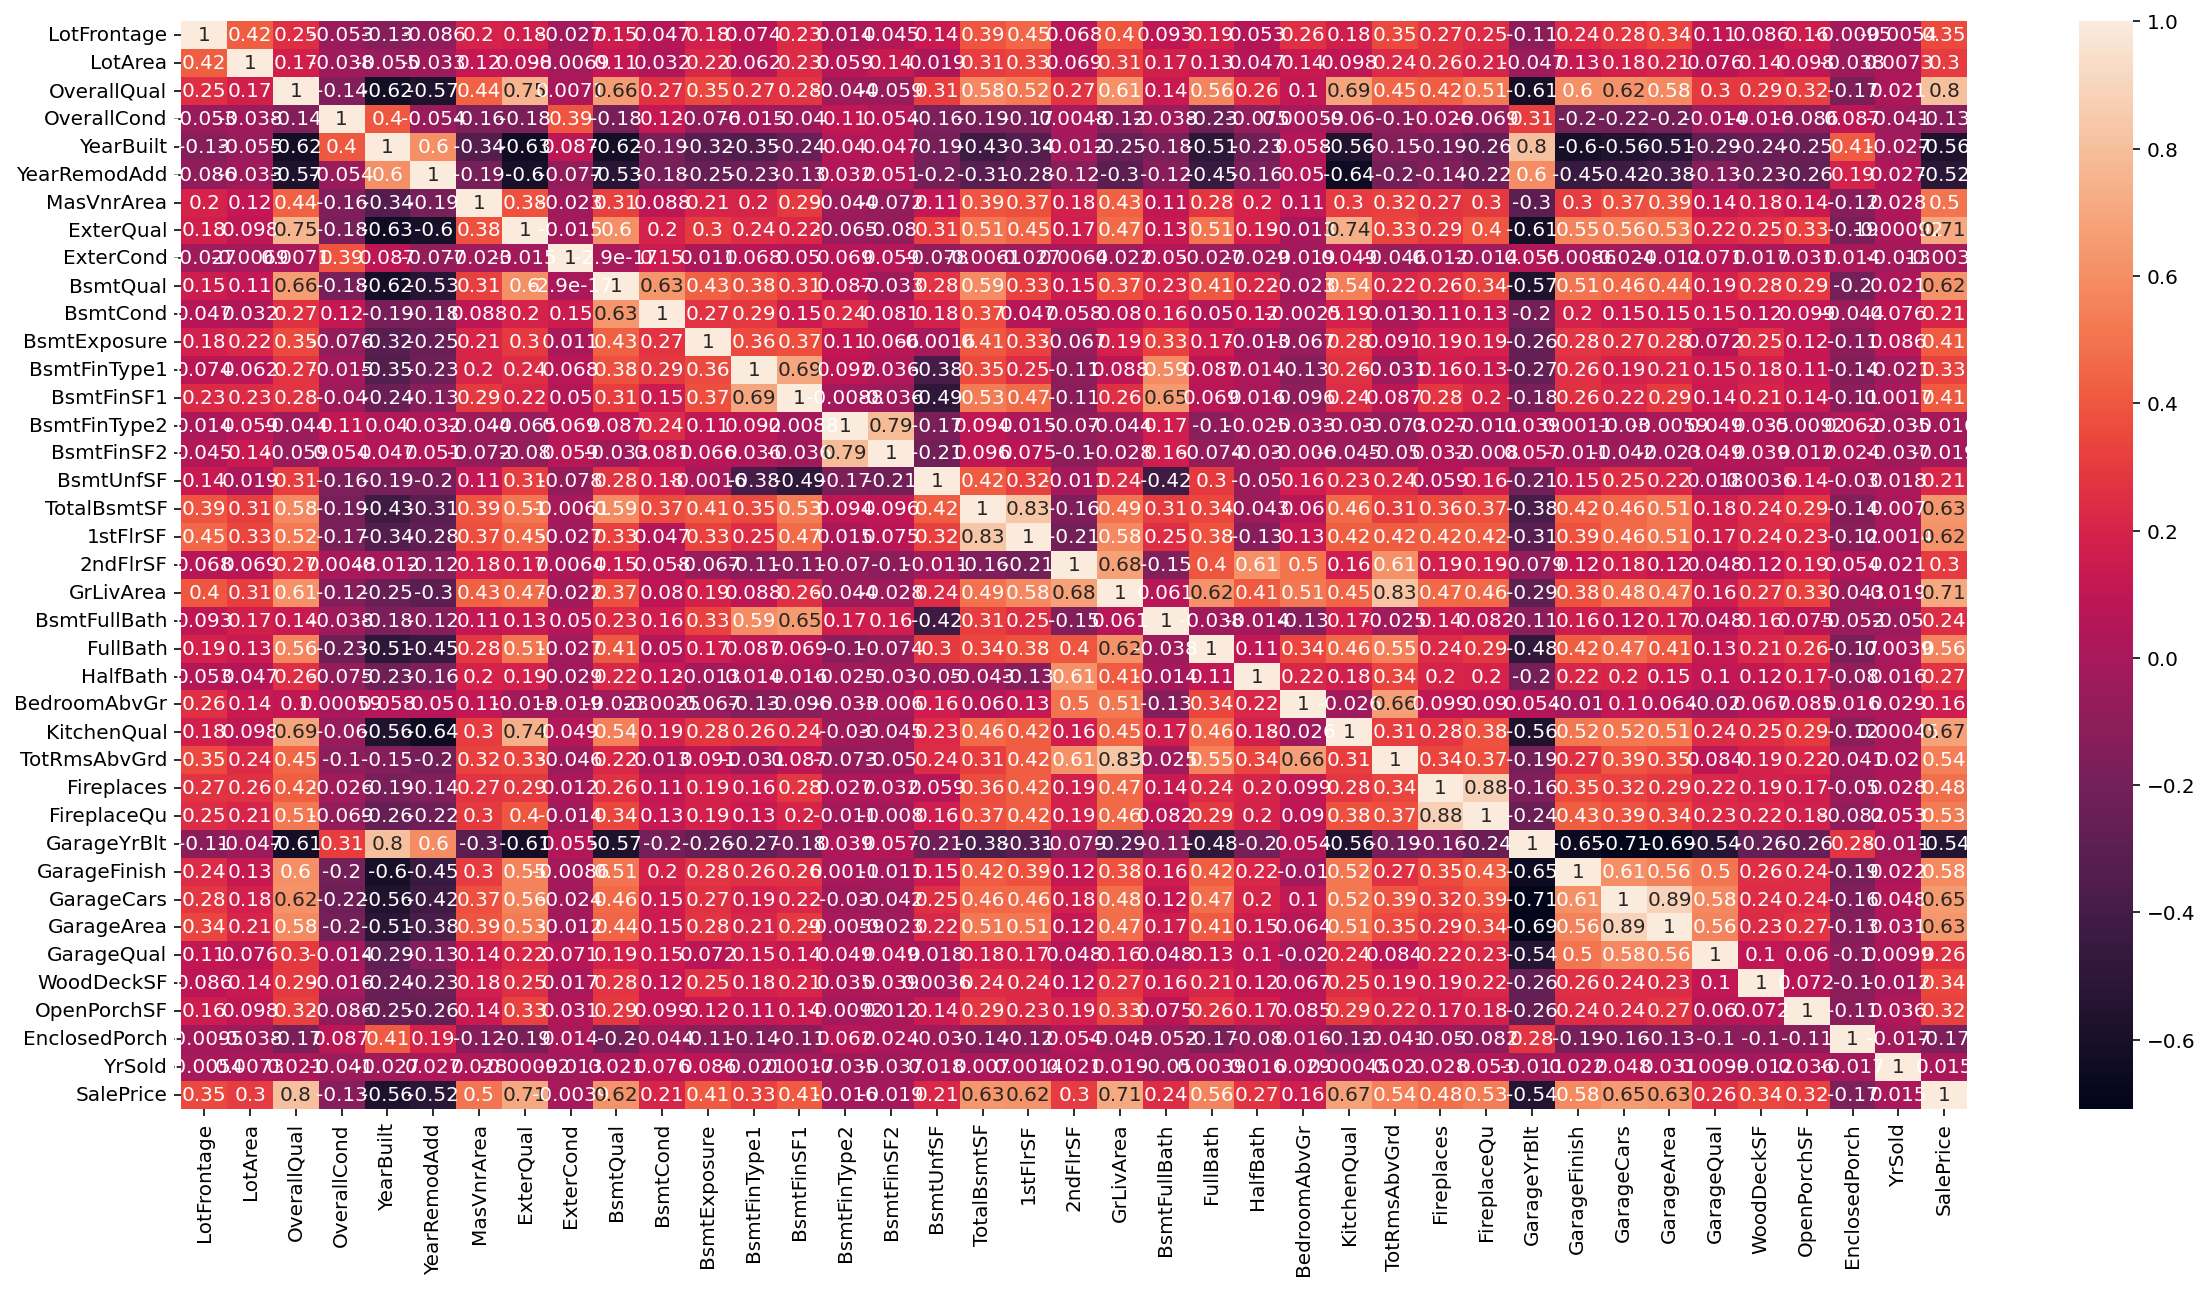

In [17]:
# Plotting Heatmap for numerical variables

fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(data[num_var].corr(),annot=True)

In [18]:
# Let's create a list with all the high correlations above 0.8 and below -0.8

corr = data[num_var].corr()
ind = corr.index.tolist()
corr_list = []
for i in corr:
    for inde,j in enumerate(corr[i]):
        if (float(j)>.8) or (float(j) <-.8):
            if float(j) != 1.0:
                corr_list.append([i,corr.index[inde],j])
corr_list

[['OverallQual', 'SalePrice', 0.8020368402992588],
 ['YearBuilt', 'GarageYrBlt', 0.8046446905004656],
 ['TotalBsmtSF', '1stFlrSF', 0.8323091271711511],
 ['1stFlrSF', 'TotalBsmtSF', 0.8323091271711511],
 ['GrLivArea', 'TotRmsAbvGrd', 0.8254110181402806],
 ['TotRmsAbvGrd', 'GrLivArea', 0.8254110181402806],
 ['Fireplaces', 'FireplaceQu', 0.875795864981346],
 ['FireplaceQu', 'Fireplaces', 0.875795864981346],
 ['GarageYrBlt', 'YearBuilt', 0.8046446905004656],
 ['GarageCars', 'GarageArea', 0.8896869640682743],
 ['GarageArea', 'GarageCars', 0.8896869640682743],
 ['SalePrice', 'OverallQual', 0.8020368402992588]]

The fist rows are the variables correlated between them and the last is the variable highly correlated with the target variable \(SalePrice\). Notice that TotRmsAbvGrd \(Total rooms above grade\) has a correlation of 0.83 with GrLivArea. One of these variables can be dropped, but looking carefully to the variables highly correlated with the target, GrLivArea appears among them, that means that the variable to be dropped is TotRmsAbvGrd. Another pair of variables highly correlated are GarageCars and GarageArea


In [19]:
# Converting cathegorical variables to dummies

for i in cat_var:
    var = pd.get_dummies(data[i],drop_first=True,prefix=i,prefix_sep='_')
    data = pd.concat([data,var],axis=1)

# Dropping categorical variables

data.drop(cat_var,axis=1,inplace=True)

In [20]:
data.head(3)

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5         20            20   
1         80.0     9600            6            8         47            47   
2         68.0    11250            7            5         22            21   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0       196.0          3          2         4         3             1   
1         0.0          2          2         4         3             4   
2       162.0          3          2         4         3             2   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             6         706             1           0        150          856   
1             5         978             1           0        284         1262   
2             6         486             1           0        434          920   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0       856       854       1710             1         2         1   
1      1262         0       1262             0         2         0   
2       920       866       1786             1         2         1   

   BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  \
0             3            3             8           0            0   
1             3            2             6           1            3   
2             3            3             6           1            3   

   GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  WoodDeckSF  \
0         20.0             2           2         548           3           0   
1         47.0             2           2         460           3         298   
2         22.0             2           2         608           3           0   

   OpenPorchSF  EnclosedPorch  YrSold  SalePrice  MSSubClass_1-STORY_1945  \
0           61              0      15     208500                        0   
1            0              0      16     181500                        0   
2           42              0      15     223500                        0   

   MSSubClass_1-STORY_1946  MSSubClass_1-STORY_PUD  \
0                        0                       0   
1                        1                       0   
2                        0                       0   

   MSSubClass_1-STORY_W/FINISHED_ATTIC  MSSubClass_2-STORY_1945  \
0                                    0                        0   
1                                    0                        0   
2                                    0                        0   

   MSSubClass_2-STORY_1946  MSSubClass_2-STORY_PUD  \
0                        1                       0   
1                        0                       0   
2                        1                       0   

   MSSubClass_2_FAMILY_CONVERSION  MSSubClass_DUPLEX  \
0                               0                  0   
1                               0                  0   
2                               0                  0   

   MSSubClass_PUD-MULTILEVEL  MSSubClass_SPLIT_OR_MULTI-LEVEL  MSZoning_FV  \
0                          0                                0            0   
1                          0                                0            0   
2                          0                                0            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
0            0            1            0             0             0   
1            0            1            0             0             0   
2            0            1            0             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Ins

## Simple Linear Regression

Now all the features are ready to be inputted in the model. It is necessary to  standardize all then numeric variables using MinMaxScale. Then split the set in train and test. Following with initializing the model. Finally, select a low number of features to be used using RFE and verify multicorrelation using VIF


In [21]:
# Standardizing all numeric variables

scaler = MinMaxScaler()
data[num_var] = scaler.fit_transform(data[num_var])

# Making a copy of the data set
df = data.copy()

# Splitting variables

X = data.drop('SalePrice',axis=1)
y = data['SalePrice']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=13)

The optimal number of features to select is 5 because it is the highest mean test score. However, RFE will help us to discard all the variables with multicolinearity. For that reason we will run RFE with 15 variables and after dropping the highly correlated ones, just 5 variables will be selected at the end.


In [22]:
# Instanciating the Linear Regression model

lm = LinearRegression()

# Selecting 45 features using RFE

rfe = RFE(lm,n_features_to_select=45)
rfe = rfe.fit(X_train,y_train)
col_selection = list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [23]:
# Selecting features

features = []
for i in col_selection:
    if i[1] == True:
        print(i)
        features.append(i[0])

('LotFrontage', True, 1)
('LotArea', True, 1)
('OverallQual', True, 1)
('OverallCond', True, 1)
('ExterQual', True, 1)
('BsmtQual', True, 1)
('BsmtCond', True, 1)
('BsmtExposure', True, 1)
('BsmtFinType1', True, 1)
('BsmtFinSF2', True, 1)
('TotalBsmtSF', True, 1)
('2ndFlrSF', True, 1)
('GrLivArea', True, 1)
('BsmtFullBath', True, 1)
('Fireplaces', True, 1)
('GarageFinish', True, 1)
('GarageCars', True, 1)
('GarageArea', True, 1)
('GarageQual', True, 1)
('OpenPorchSF', True, 1)
('MSSubClass_1-STORY_PUD', True, 1)
('MSSubClass_2-STORY_PUD', True, 1)
('LotShape_IR3', True, 1)
('LandContour_HLS', True, 1)
('LandContour_Lvl', True, 1)
('LotConfig_CulDSac', True, 1)
('Neighborhood_BrDale', True, 1)
('Neighborhood_Crawfor', True, 1)
('Neighborhood_NoRidge', True, 1)
('Neighborhood_NridgHt', True, 1)
('Neighborhood_Somerst', True, 1)
('Neighborhood_StoneBr', True, 1)
('Neighborhood_Veenker', True, 1)
('Condition1_Norm', True, 1)
('Condition1_PosN', True, 1)
('BldgType_Twnhs', True, 1)
('BldgTy

In [24]:
vif = pd.DataFrame()
vif['features'] = features
vif["VIF"] = [variance_inflation_factor(X_train[features].values,i) for i in range(X_train[features].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

features    VIF
5                 BsmtQual  70.43
6                 BsmtCond  65.40
18              GarageQual  63.40
12               GrLivArea  63.21
2              OverallQual  62.88
10             TotalBsmtSF  45.27
43            SaleType_New  43.57
44   SaleCondition_Partial  42.66
16              GarageCars  37.27
17              GarageArea  34.14
4                ExterQual  22.17
24         LandContour_Lvl  18.39
11                2ndFlrSF  15.77
3              OverallCond  15.64
36         BldgType_TwnhsE  11.06
15            GarageFinish  10.99
0              LotFrontage  10.37
20  MSSubClass_1-STORY_PUD   9.22
33         Condition1_Norm   8.75
37       HouseStyle_1Story   8.73
8             BsmtFinType1   7.60
21  MSSubClass_2-STORY_PUD   6.83
1                  LotArea   6.47
7             BsmtExposure   5.62
35          BldgType_Twnhs   5.15
41    GarageType_No Garage   4.47
13            BsmtFullBath   2.98
14              Fireplaces   2.78
23         LandContour_HLS   2.02
19             OpenPorchSF   1.89
29    Neighborhood_NridgHt   1.75
26     Neighborhood_BrDale   1.57
30    Neighborhood_Somerst   1.50
32    Neighborhood_Veenker   1.35
42            SaleType_Con   1.35
25       LotConfig_CulDSac   1.31
28    Neighborhood_NoRidge   1.30
31    Neighborhood_StoneBr   1.24
27    Neighborhood_Crawfor   1.24
22            LotShape_IR3   1.21
9               BsmtFinSF2   1.19
38       HouseStyle_2.5Fin   1.15
34         Condition1_PosN   1.15
40      Exterior2nd_Stucco   1.10
39     Exterior2nd_ImStucc   1.07

Eliminating features with values above and then evaluated VIF again.


In [25]:
#Removing features

for i in vif[vif['VIF']>20]['features']:
    features.remove(i)
#features.remove('RoofMatl_CompShg') #with just 15
vif = pd.DataFrame()
vif['features'] = features
vif["VIF"] = [variance_inflation_factor(X_train[features].values,i) for i in range(X_train[features].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

features    VIF
15         LandContour_Lvl  13.65
2              OverallCond  10.50
27         BldgType_TwnhsE  10.47
9             GarageFinish   9.08
0              LotFrontage   9.07
11  MSSubClass_1-STORY_PUD   8.80
24         Condition1_Norm   7.94
28       HouseStyle_1Story   7.22
4             BsmtFinType1   7.03
12  MSSubClass_2-STORY_PUD   6.63
6                 2ndFlrSF   5.98
1                  LotArea   5.96
26          BldgType_Twnhs   4.93
3             BsmtExposure   4.84
7             BsmtFullBath   2.92
8               Fireplaces   2.42
14         LandContour_HLS   1.84
10             OpenPorchSF   1.80
17     Neighborhood_BrDale   1.53
32    GarageType_No Garage   1.42
33            SaleType_Con   1.34
23    Neighborhood_Veenker   1.33
20    Neighborhood_NridgHt   1.30
16       LotConfig_CulDSac   1.28
21    Neighborhood_Somerst   1.27
19    Neighborhood_NoRidge   1.24
18    Neighborhood_Crawfor   1.21
22    Neighborhood_StoneBr   1.18
13            LotShape_IR3   1.16
5               BsmtFinSF2   1.16
25         Condition1_PosN   1.12
29       HouseStyle_2.5Fin   1.07
31      Exterior2nd_Stucco   1.07
30     Exterior2nd_ImStucc   1.06

In [26]:
#Removing features

for i in vif[vif['VIF']>10]['features']:
    features.remove(i)
#features.remove('RoofMatl_CompShg') #with just 15
vif = pd.DataFrame()
vif['features'] = features
vif["VIF"] = [variance_inflation_factor(X_train[features].values,i) for i in range(X_train[features].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

features   VIF
8             GarageFinish  8.69
0              LotFrontage  8.54
22         Condition1_Norm  6.91
3             BsmtFinType1  6.76
25       HouseStyle_1Story  5.95
1                  LotArea  5.84
5                 2ndFlrSF  5.00
2             BsmtExposure  4.68
6             BsmtFullBath  2.90
11  MSSubClass_2-STORY_PUD  2.45
7               Fireplaces  2.41
24          BldgType_Twnhs  2.08
9              OpenPorchSF  1.79
10  MSSubClass_1-STORY_PUD  1.57
15     Neighborhood_BrDale  1.52
29    GarageType_No Garage  1.37
30            SaleType_Con  1.34
21    Neighborhood_Veenker  1.31
14       LotConfig_CulDSac  1.27
19    Neighborhood_Somerst  1.26
18    Neighborhood_NridgHt  1.25
13         LandContour_HLS  1.24
17    Neighborhood_NoRidge  1.20
16    Neighborhood_Crawfor  1.18
20    Neighborhood_StoneBr  1.17
4               BsmtFinSF2  1.15
12            LotShape_IR3  1.14
23         Condition1_PosN  1.12
28      Exterior2nd_Stucco  1.07
27     Exterior2nd_ImStucc  1.06
26       HouseStyle_2.5Fin  1.05

In [27]:
#Removing features

for i in vif[vif['VIF']>6]['features']:
    features.remove(i)
#features.remove('RoofMatl_CompShg') #with just 15
vif = pd.DataFrame()
vif['features'] = features
vif["VIF"] = [variance_inflation_factor(X_train[features].values,i) for i in range(X_train[features].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

features   VIF
0                  LotArea  4.98
1             BsmtExposure  3.71
21       HouseStyle_1Story  3.19
3                 2ndFlrSF  3.08
8   MSSubClass_2-STORY_PUD  2.36
5               Fireplaces  2.30
4             BsmtFullBath  2.05
20          BldgType_Twnhs  2.05
6              OpenPorchSF  1.77
12     Neighborhood_BrDale  1.52
7   MSSubClass_1-STORY_PUD  1.39
26            SaleType_Con  1.33
18    Neighborhood_Veenker  1.29
16    Neighborhood_Somerst  1.25
10         LandContour_HLS  1.23
15    Neighborhood_NridgHt  1.23
14    Neighborhood_NoRidge  1.19
11       LotConfig_CulDSac  1.17
13    Neighborhood_Crawfor  1.17
17    Neighborhood_StoneBr  1.16
2               BsmtFinSF2  1.14
25    GarageType_No Garage  1.10
9             LotShape_IR3  1.08
24      Exterior2nd_Stucco  1.06
19         Condition1_PosN  1.05
23     Exterior2nd_ImStucc  1.05
22       HouseStyle_2.5Fin  1.04

Now, let's take a look at the correlation matrix with the features selected and let's choose those that have more correlation with the target variable.


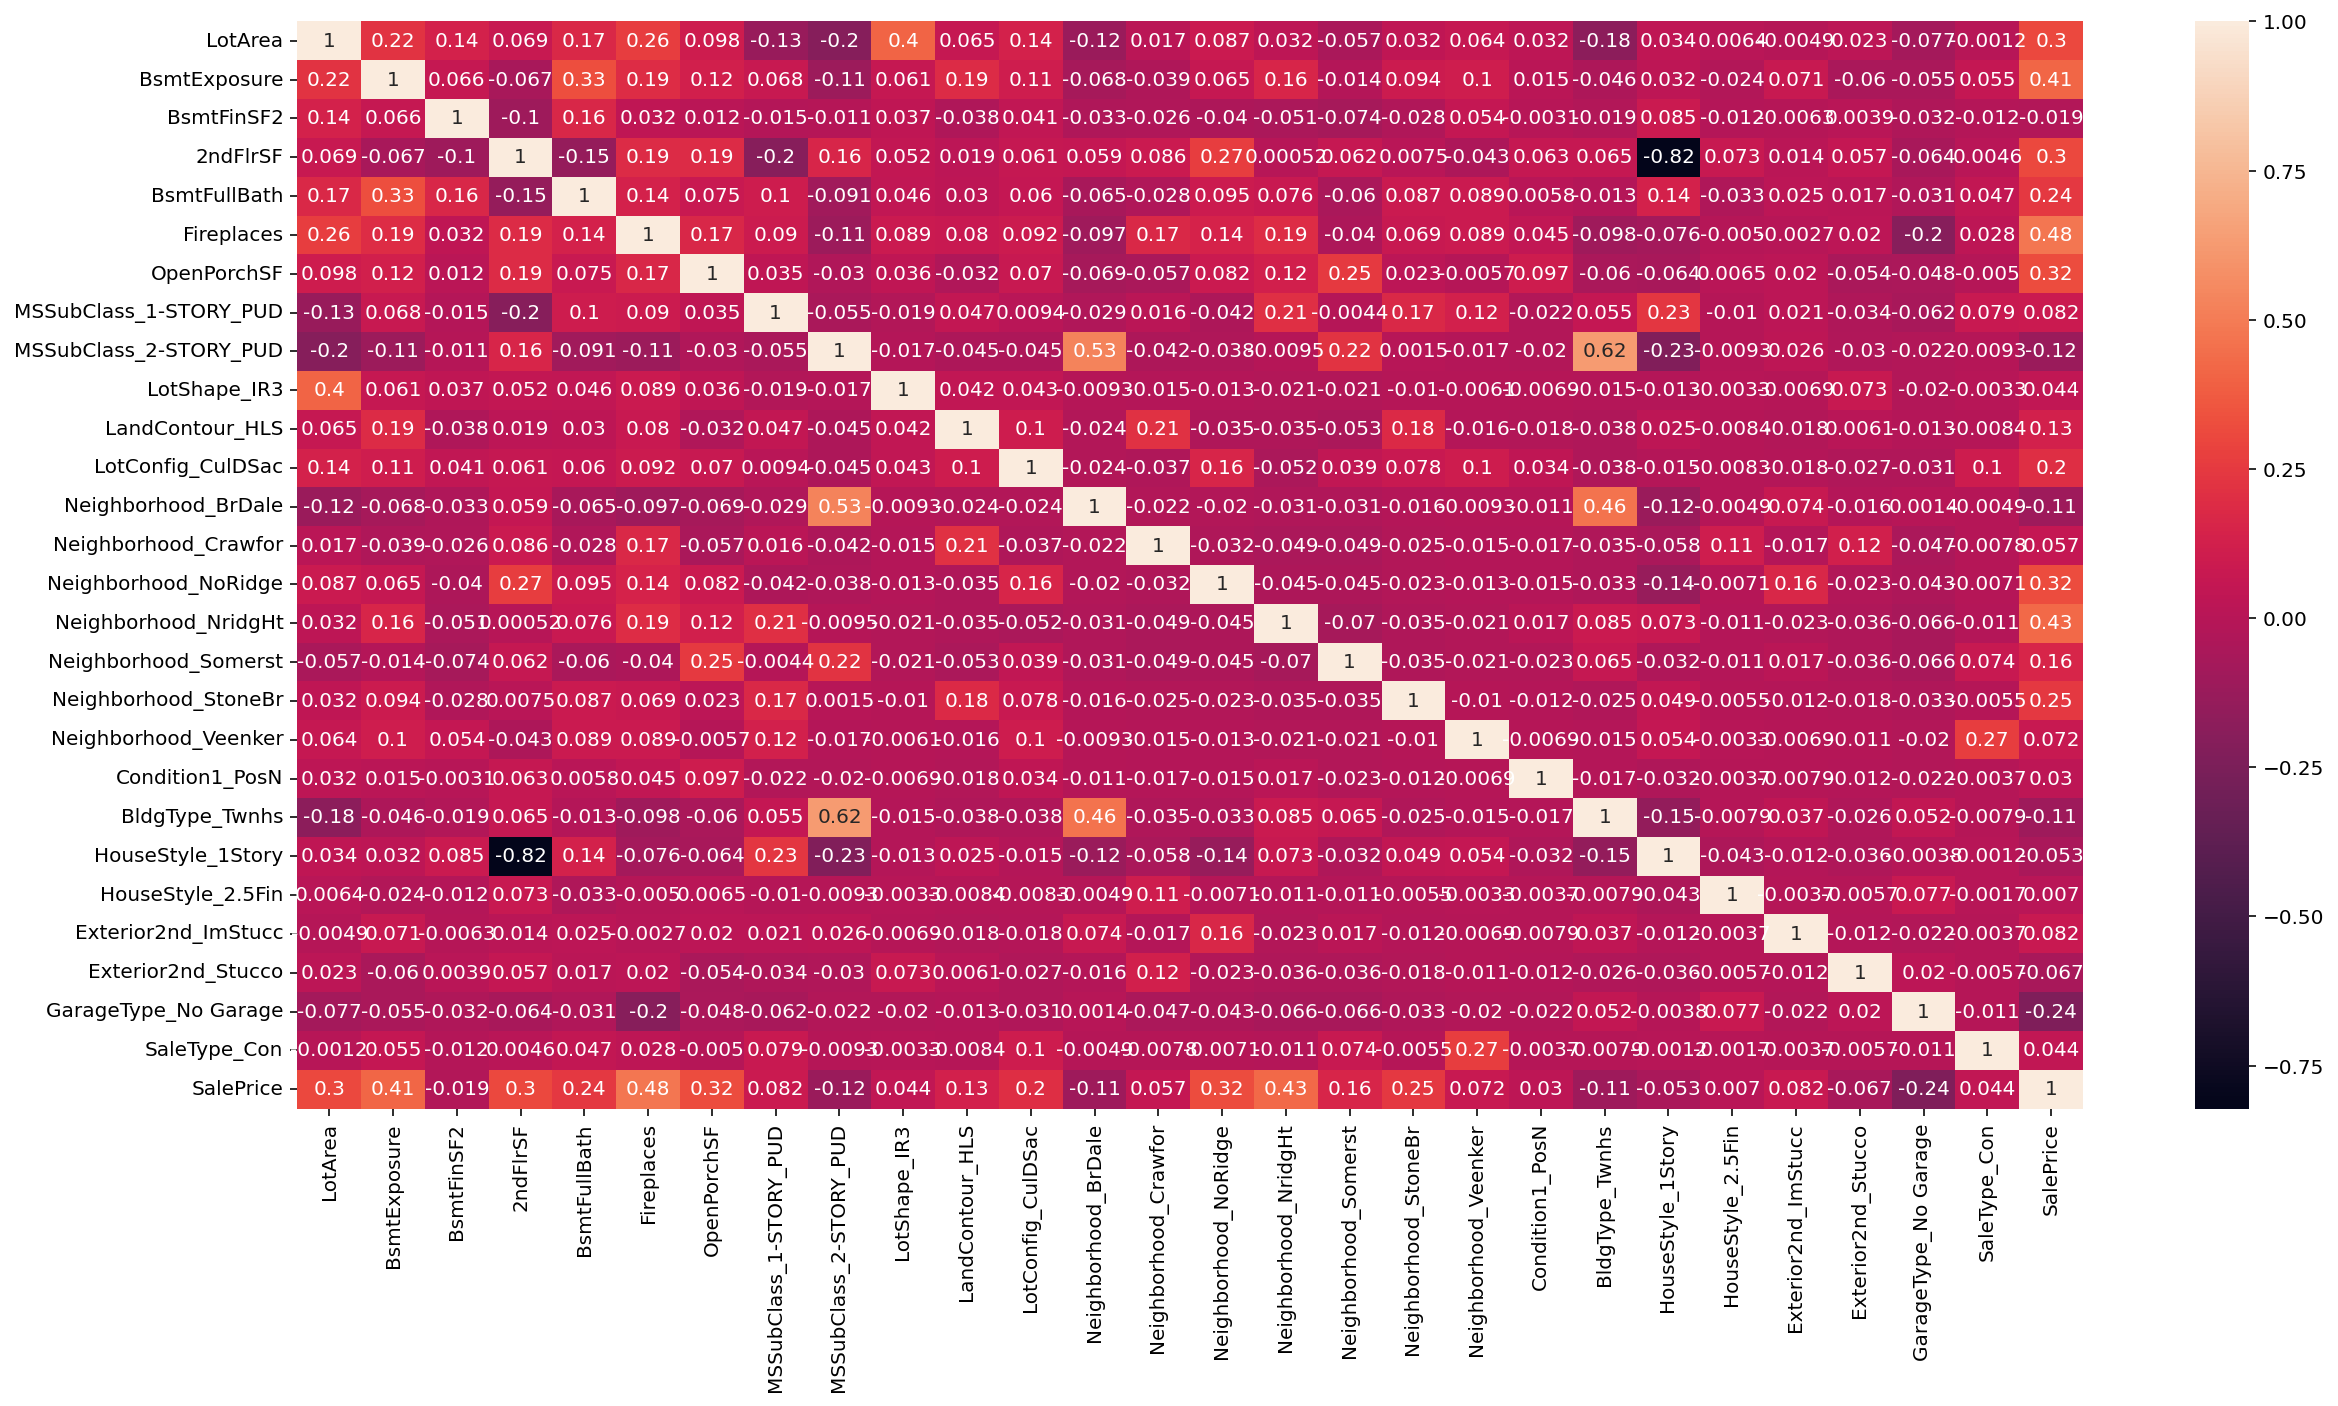

In [28]:
# Heatmap of correlation
features.append('SalePrice')
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(data[features].corr(),annot=True)
features.remove('SalePrice')

Now it is time to create the first model using simple linear regression.



In [29]:
# Instanciating Linear Regression

lm = LinearRegression()
lm.fit(X_train[features],y_train)
y_train_pred = lm.predict(X_train[features])
res = y_train - y_train_pred

In [30]:
# Printint intercept and coeficients

print(lm.intercept_)
print(lm.coef_)

0.01945705484050808
[ 3.19141017e-01  1.02737015e-01  1.86146794e-02  2.39765274e-01
  6.39763115e-02  1.00857067e-01  4.61877725e-02 -1.75304978e-02
 -2.23720597e-02 -6.81994006e-02  2.88869356e-02  4.81524556e-02
  2.15447852e-02  3.59950854e-02  1.35315330e-01  1.77848299e-01
  9.08186182e-02  1.62571454e-01  3.21722720e-02 -2.13472556e-02
 -3.30636757e-02  6.66000578e-02 -8.36575830e-05  9.85266541e-02
 -4.34084847e-02 -4.29598986e-02  2.32218565e-02]


In [31]:
# Printing some important measures

rss = np.sum(np.square(y_train-y_train_pred))
mse = mean_squared_error(y_train,y_train_pred)
rmse = mse ** 0.5
r2 = r2_score(y_train,y_train_pred)
print("R2", r2)
print("RSS",rss)
print('MSE',mse)
print("RMSE",rmse)

R2 0.7326374616735895
RSS 2.7734967678949904
MSE 0.0034367989688909423
RMSE 0.05862421827957233


Now, it is crucial to compare the results from the train set with the test set. In the following block, predictions for test set and important measures are being calculating.


In [32]:
y_test_pred = lm.predict(X_test[features])
res_test = y_test - y_test_pred

rss = np.sum(np.square(y_test-y_test_pred))
mse = mean_squared_error(y_test,y_test_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test,y_test_pred)
print("R2", r2)
print("RSS",rss)
print('MSE',mse)
print("RMSE",rmse)

R2 0.6849423942608512
RSS 1.5865271839971176
MSE 0.004572124449559417
RMSE 0.0676174862706343


It is noticeable that values on train set are ok, however, values on test set are terrrible. This means that the model is not picking the information accurately. Let's analyze the residual to have a good understanding of the issue


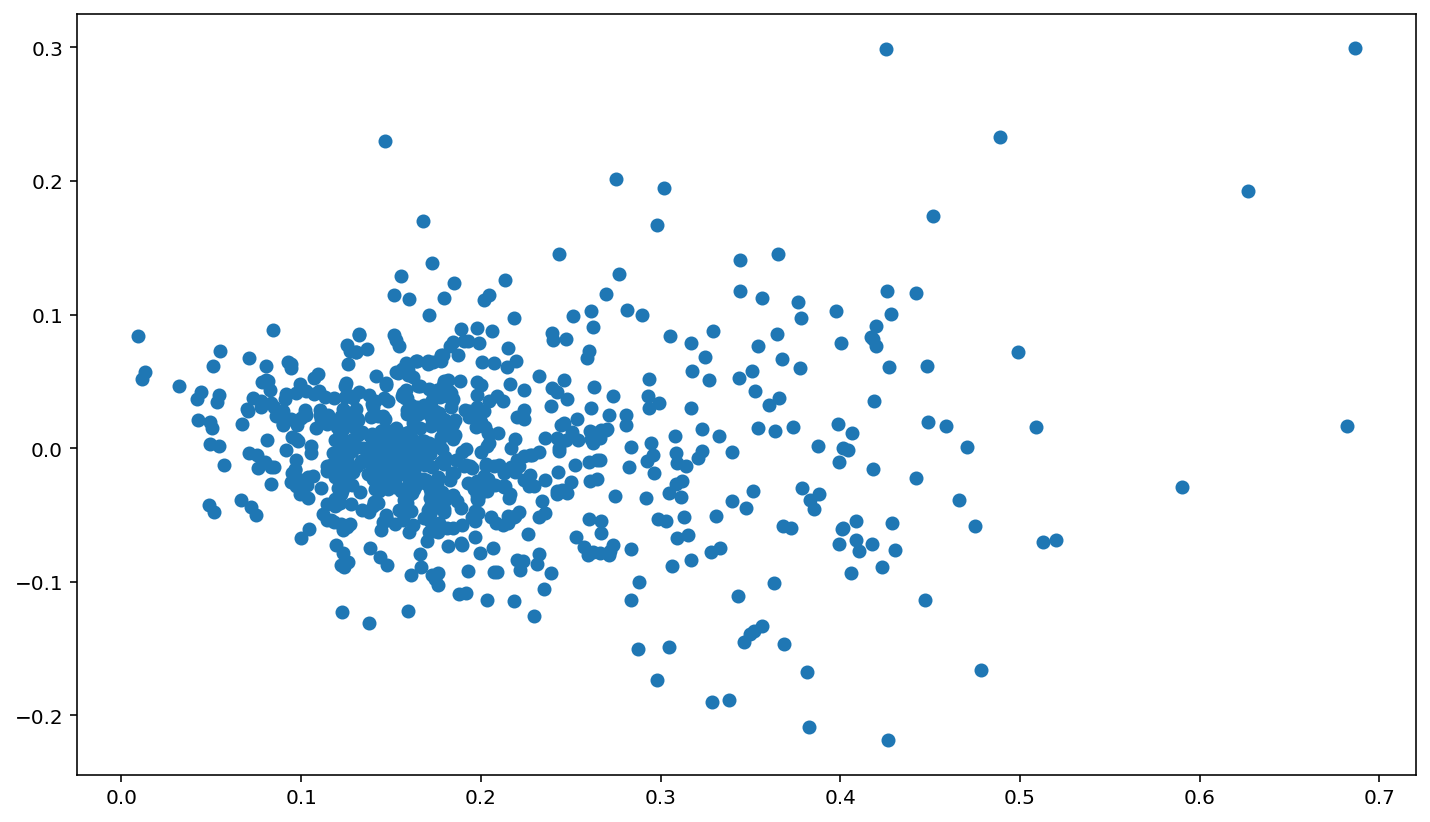

In [33]:
# Plotting residuals

plt.scatter(y_train_pred,res)
plt.show()

Residual graph show a pattern like a cone. This means that exist heteroscedasticity. To solve it, it is necesary to transform target variable using log or root square functions, but first let's see if erros follow a normal distribution.


/tmp/ipykernel_287/2022770741.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(res,kde=True)


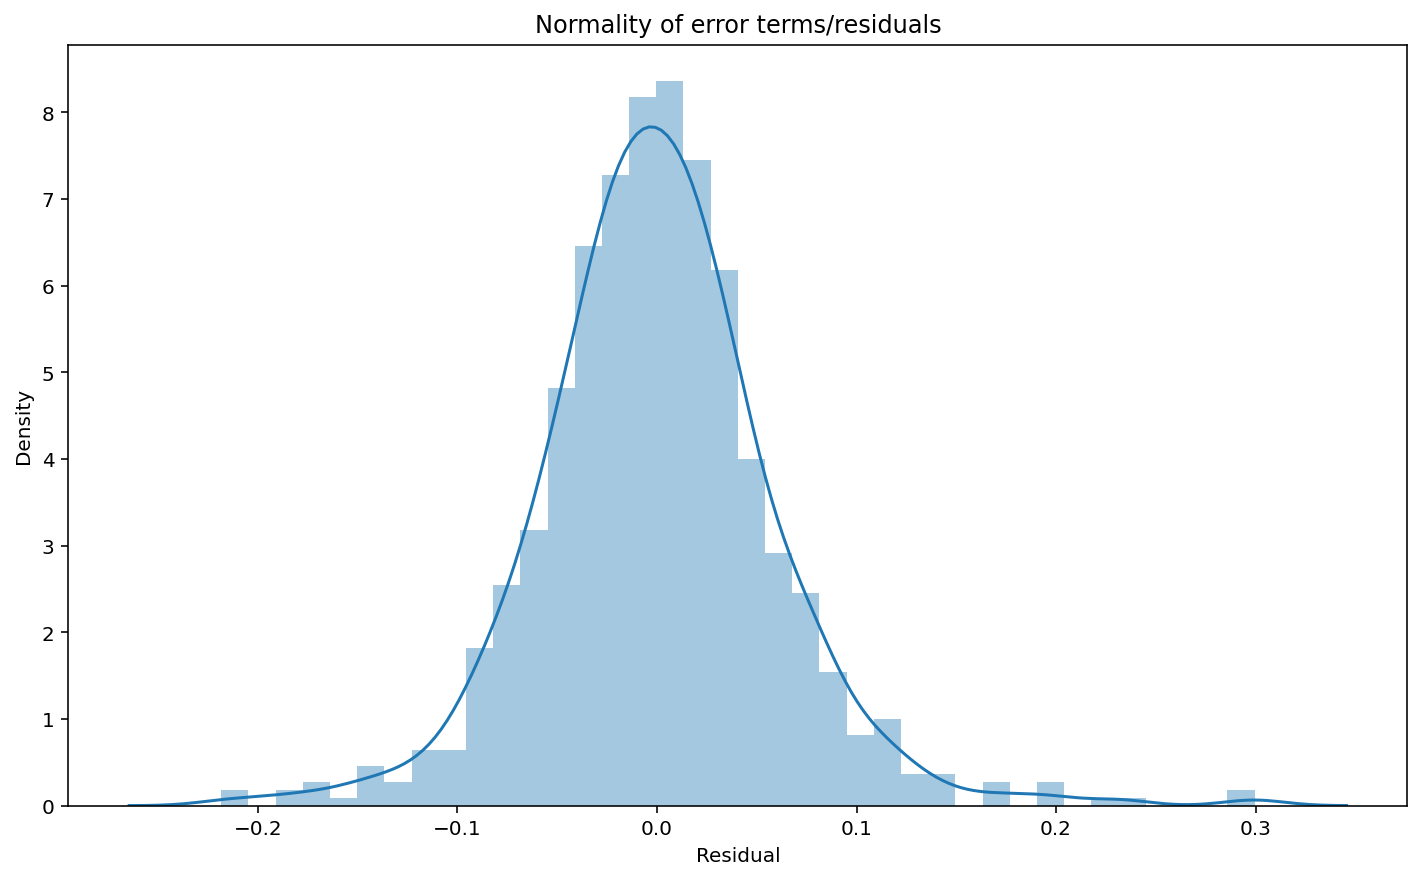

In [34]:
# Distribution of errors
p = sns.distplot(res,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

Errors have a good normal shape. Then target variable will be transformed using root square. Both functions were tested \(log and sqrt\), but the one that have better results was square root.


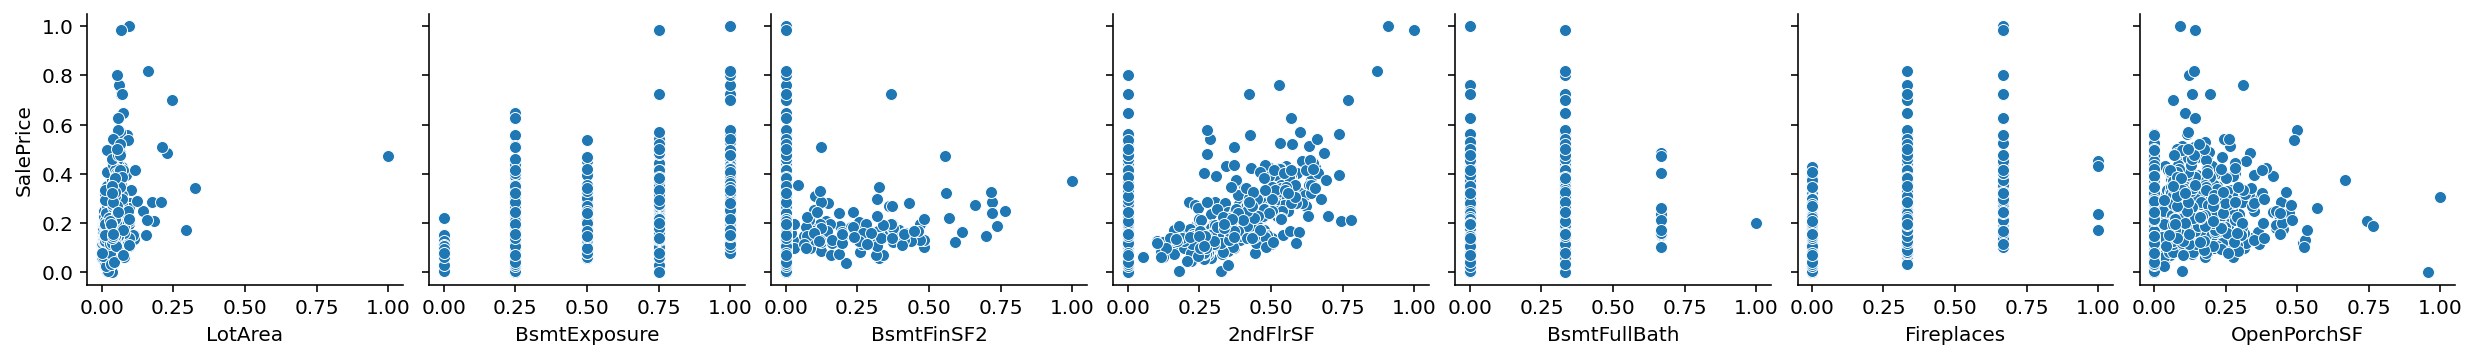

In [35]:
# Plotting variables against target variable before transformation

sns.pairplot(data,x_vars=features[:7],y_vars='SalePrice')

In [36]:
# Transforming target variable and BsmtFinSF1 variable

data['SalePrice_root2'] = (data['SalePrice'])**0.5
data['2ndFlrSF_square'] = data['2ndFlrSF']**2
data['BsmtFinSF2_square'] = data['BsmtFinSF2']**2

After transformation, let's run the linear regression again to analyze changes.


In [37]:
# Spliting into train and test again with the same random state as before

X = data.drop(['SalePrice','SalePrice_root2'],axis=1)
y = data['SalePrice_root2']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=13)

# Fitting linear regression
features.append('2ndFlrSF_square')
features.append('BsmtFinSF2_square')
lm.fit(X_train[features],y_train)
y_train_pred = lm.predict(X_train[features])
res = y_train - y_train_pred

# Calculating important measures

rss = np.sum(np.square(y_train-y_train_pred))
mse = mean_squared_error(y_train,y_train_pred)
rmse = mse ** 0.5
r2 = r2_score(y_train,y_train_pred)
print("R2", r2)
print("RSS",rss)
print('MSE',mse)
print("RMSE",rmse)

R2 0.7100208543781941
RSS 3.2646045461398074
MSE 0.004045358793233962
RMSE 0.06360313508966332


In [38]:
# Predicting for test set and calculating important measures

y_test_pred = lm.predict(X_test[features])
res_test = y_test - y_test_pred

rss = np.sum(np.square(y_test-y_test_pred))
mse = mean_squared_error(y_test,y_test_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test,y_test_pred)
print("R2", r2)
print("RSS",rss)
print('MSE',mse)
print("RMSE",rmse)

R2 0.6933626648412831
RSS 1.5268659871700823
MSE 0.004400190164755281
RMSE 0.06633392921239688


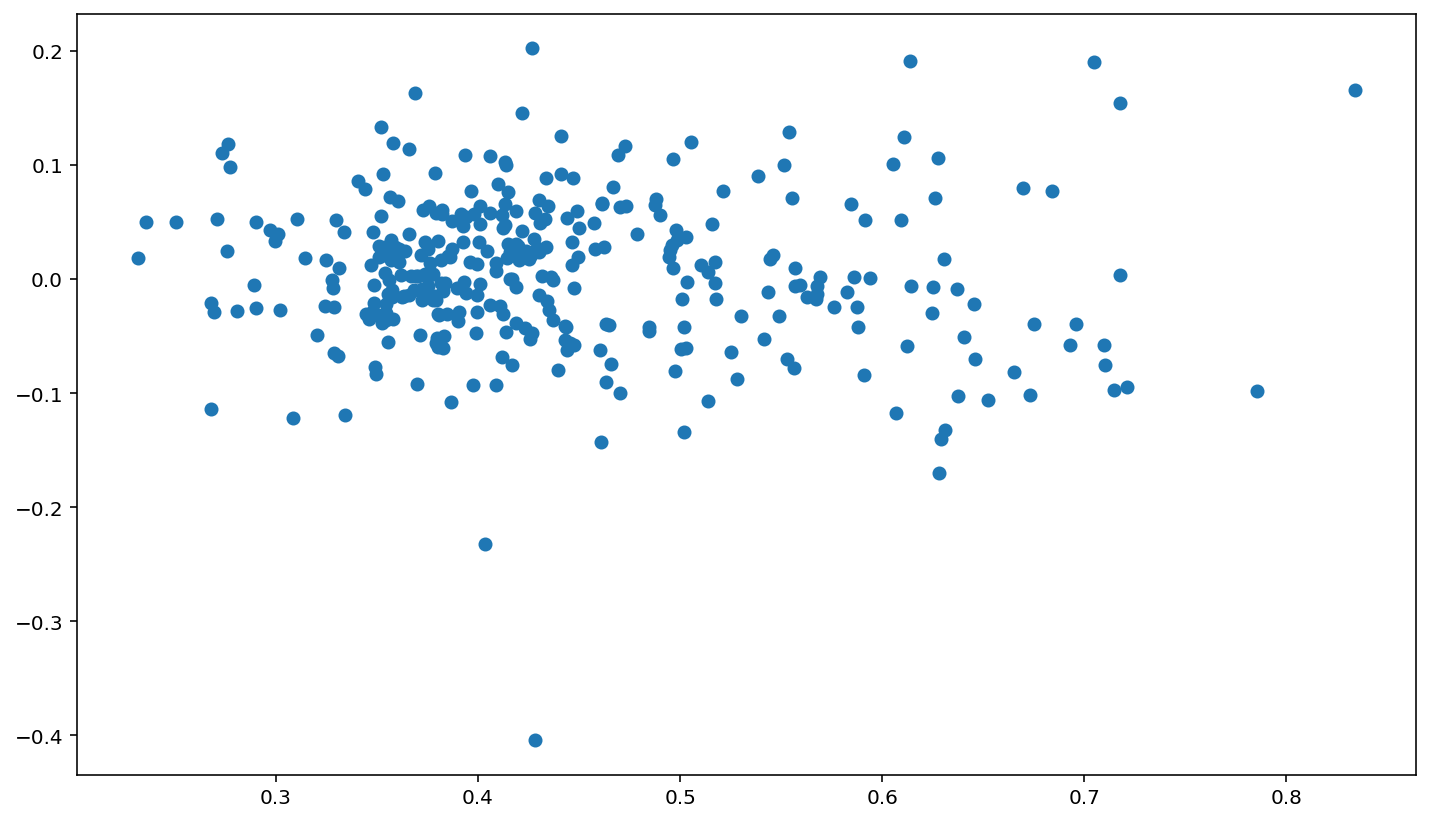

In [39]:
plt.scatter(y_test_pred,(y_test-y_test_pred))
plt.show()

/tmp/ipykernel_287/1678069683.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(y_test-y_test_pred,kde=True)


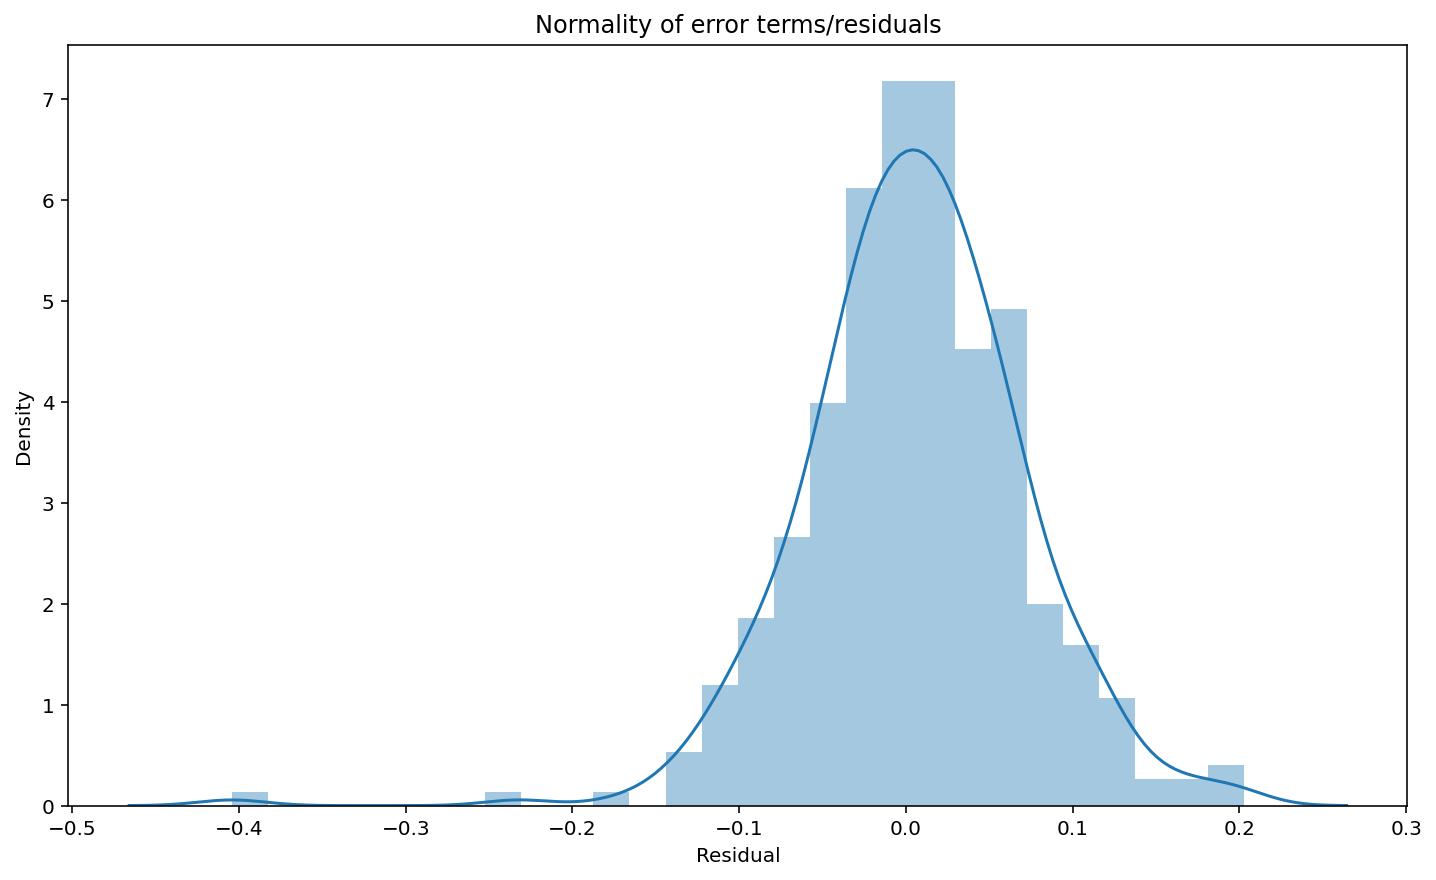

In [40]:
# Distribution of errors
p = sns.distplot(y_test-y_test_pred,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

There is no pattern anymore in the residual graph, and the errors are still normal


## Polynomial Regression

After the transformation in the variables, R2 score was still low for the test set. This was an indicative of need for improvement. The next step is to find a possible polynomial regression that can make the model better. Polinomials of degree 2, 3, 4 and 5 were tested. Nevertheless, the degree that show a difference in improving the score was the one of degree 2.


In [41]:
# Building the polynomial regression model with degree 2

X = data.drop(['SalePrice','SalePrice_root2'],axis=1)
y = data['SalePrice_root2']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=13)

degree=3 # got this number through trial and this is the lowest value which fit the data perfectly
polyreg2 = PolynomialFeatures(degree)
X_poly2 = polyreg2.fit_transform(X_train[features]) 
linreg2 = LinearRegression()
linreg2.fit(X_poly2, y_train)
y_train_pred2 = linreg2.predict(polyreg2.fit_transform(X_train[features]))

# Important measures

rss = np.sum(np.square(y_train-y_train_pred2))
mse = mean_squared_error(y_train,y_train_pred2)
rmse = mse ** 0.5
r2 = r2_score(y_train,y_train_pred2)
print("R2", r2)
print("RSS",rss)
print('MSE',mse)
print("RMSE",rmse)

R2 0.9240423640278911
RSS 0.8551361277268776
MSE 0.001059648237579774
RMSE 0.03255223859552172


In [42]:
X_test_poly2 = polyreg2.transform(X_test[features])
y_test_pred2 = linreg2.predict(X_test_poly2)

# Important measures

rss = np.sum(np.square(y_test-y_test_pred2))
mse = mean_squared_error(y_test,y_test_pred2)
rmse = mse ** 0.5
r2 = r2_score(y_test,y_test_pred2)
print("R2", r2)
print("RSS",rss)
print('MSE',mse)
print("RMSE",rmse)

R2 -1.0104755851823168e+22
RSS 5.031549080877814e+22
MSE 1.4500141443451914e+20
RMSE 12041653309.84575


## Ridge and Lasso Regression

It is time to evaluate Ridge and Lasso Regression for the model.


In [43]:
# Ridge Regression

lambdas = [0,0.00001,0.0001,0.001,0.01,0.1,1,10,100]
for i in lambdas:
    # Initializing Ridge
    ridgereg = Ridge(alpha = i) 
    ridgereg.fit(X_train[features], y_train) 
   
    
    #Computing the r2 score
    print("Lambda = ",i)
    y_pred = ridgereg.predict(X_train[features])
    print("r2 score train = " + str(r2_score(y_train, y_pred))) 
    #print(ridgereg.coef_) # model coefficients
    
    y_test_pred = ridgereg.predict(X_test[features])
    print("r2 score test = " + str(r2_score(y_test, y_test_pred))) 
    #print(ridgereg.coef_) # model coefficients

Lambda =  0


r2 score train = 0.7100208543781941
r2 score test = 0.6933626648412825
Lambda =  1e-05
r2 score train = 0.7100208543761178
r2 score test = 0.6933628810383689
Lambda =  0.0001
r2 score train = 0.7100208541706636
r2 score test = 0.6933648253569545


Lambda =  0.001
r2 score train = 0.7100208337240133
r2 score test = 0.6933841251242017
Lambda =  0.01


r2 score train = 0.7100188839409469
r2 score test = 0.6935634017687486
Lambda =  0.1
r2 score train = 0.7098904930136483
r2 score test = 0.6944294990115378
Lambda =  1
r2 score train = 0.708017451585097
r2 score test = 0.6916883962375391
Lambda =  10


r2 score train = 0.6816967846583395
r2 score test = 0.667631299461408
Lambda =  100
r2 score train = 0.41779859449833257
r2 score test = 0.40689278617807256


The optimal lambda for Ridge is 0.1. It is not the optimal for the train set, but it is for the test set, that is the reason $\lambda = 0.1$ is the chosen one.



In [44]:
 
lambdas = [0,0.00001,0.0001,0.001,0.01,0.1,1,10,100]
for i in lambdas:
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(X_train[features], y_train) # fit the model on the polynomial features
   
    
    #Computing the r2 score
    print("Lambda = ",i)
    y_pred = lassoreg.predict(X_train[features])
    print("r2 score train = " + str(r2_score(y_train, y_pred))) 
    #print(lassoreg.coef_) # model coefficients
    
    y_test_pred = lassoreg.predict(X_test[features])
    print("r2 score test = " + str(r2_score(y_test, y_test_pred))) 
    #print(lassoreg.coef_) # model coefficients

/tmp/ipykernel_287/523918581.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lassoreg.fit(X_train[features], y_train) # fit the model on the polynomial features
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.632e+00, tolerance: 1.126e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Lambda =  0
r2 score train = 0.7100208543781941
r2 score test = 0.693362664841283
Lambda =  1e-05
r2 score train = 0.7099916008448957
r2 score test = 0.693594158201421
Lambda =  0.0001
r2 score train = 0.7079283052949407
r2 score test = 0.6924814846814056


Lambda =  0.001
r2 score train = 0.6745411231247468
r2 score test = 0.6629184846763108
Lambda =  0.01
r2 score train = 0.12951763318774512
r2 score test = 0.11571763203747287
Lambda =  0.1
r2 score train = 0.0


r2 score test = -0.016481916426241305
Lambda =  1
r2 score train = 0.0
r2 score test = -0.016481916426241305
Lambda =  10
r2 score train = 0.0
r2 score test = -0.016481916426241305


Lambda =  100
r2 score train = 0.0
r2 score test = -0.016481916426241305


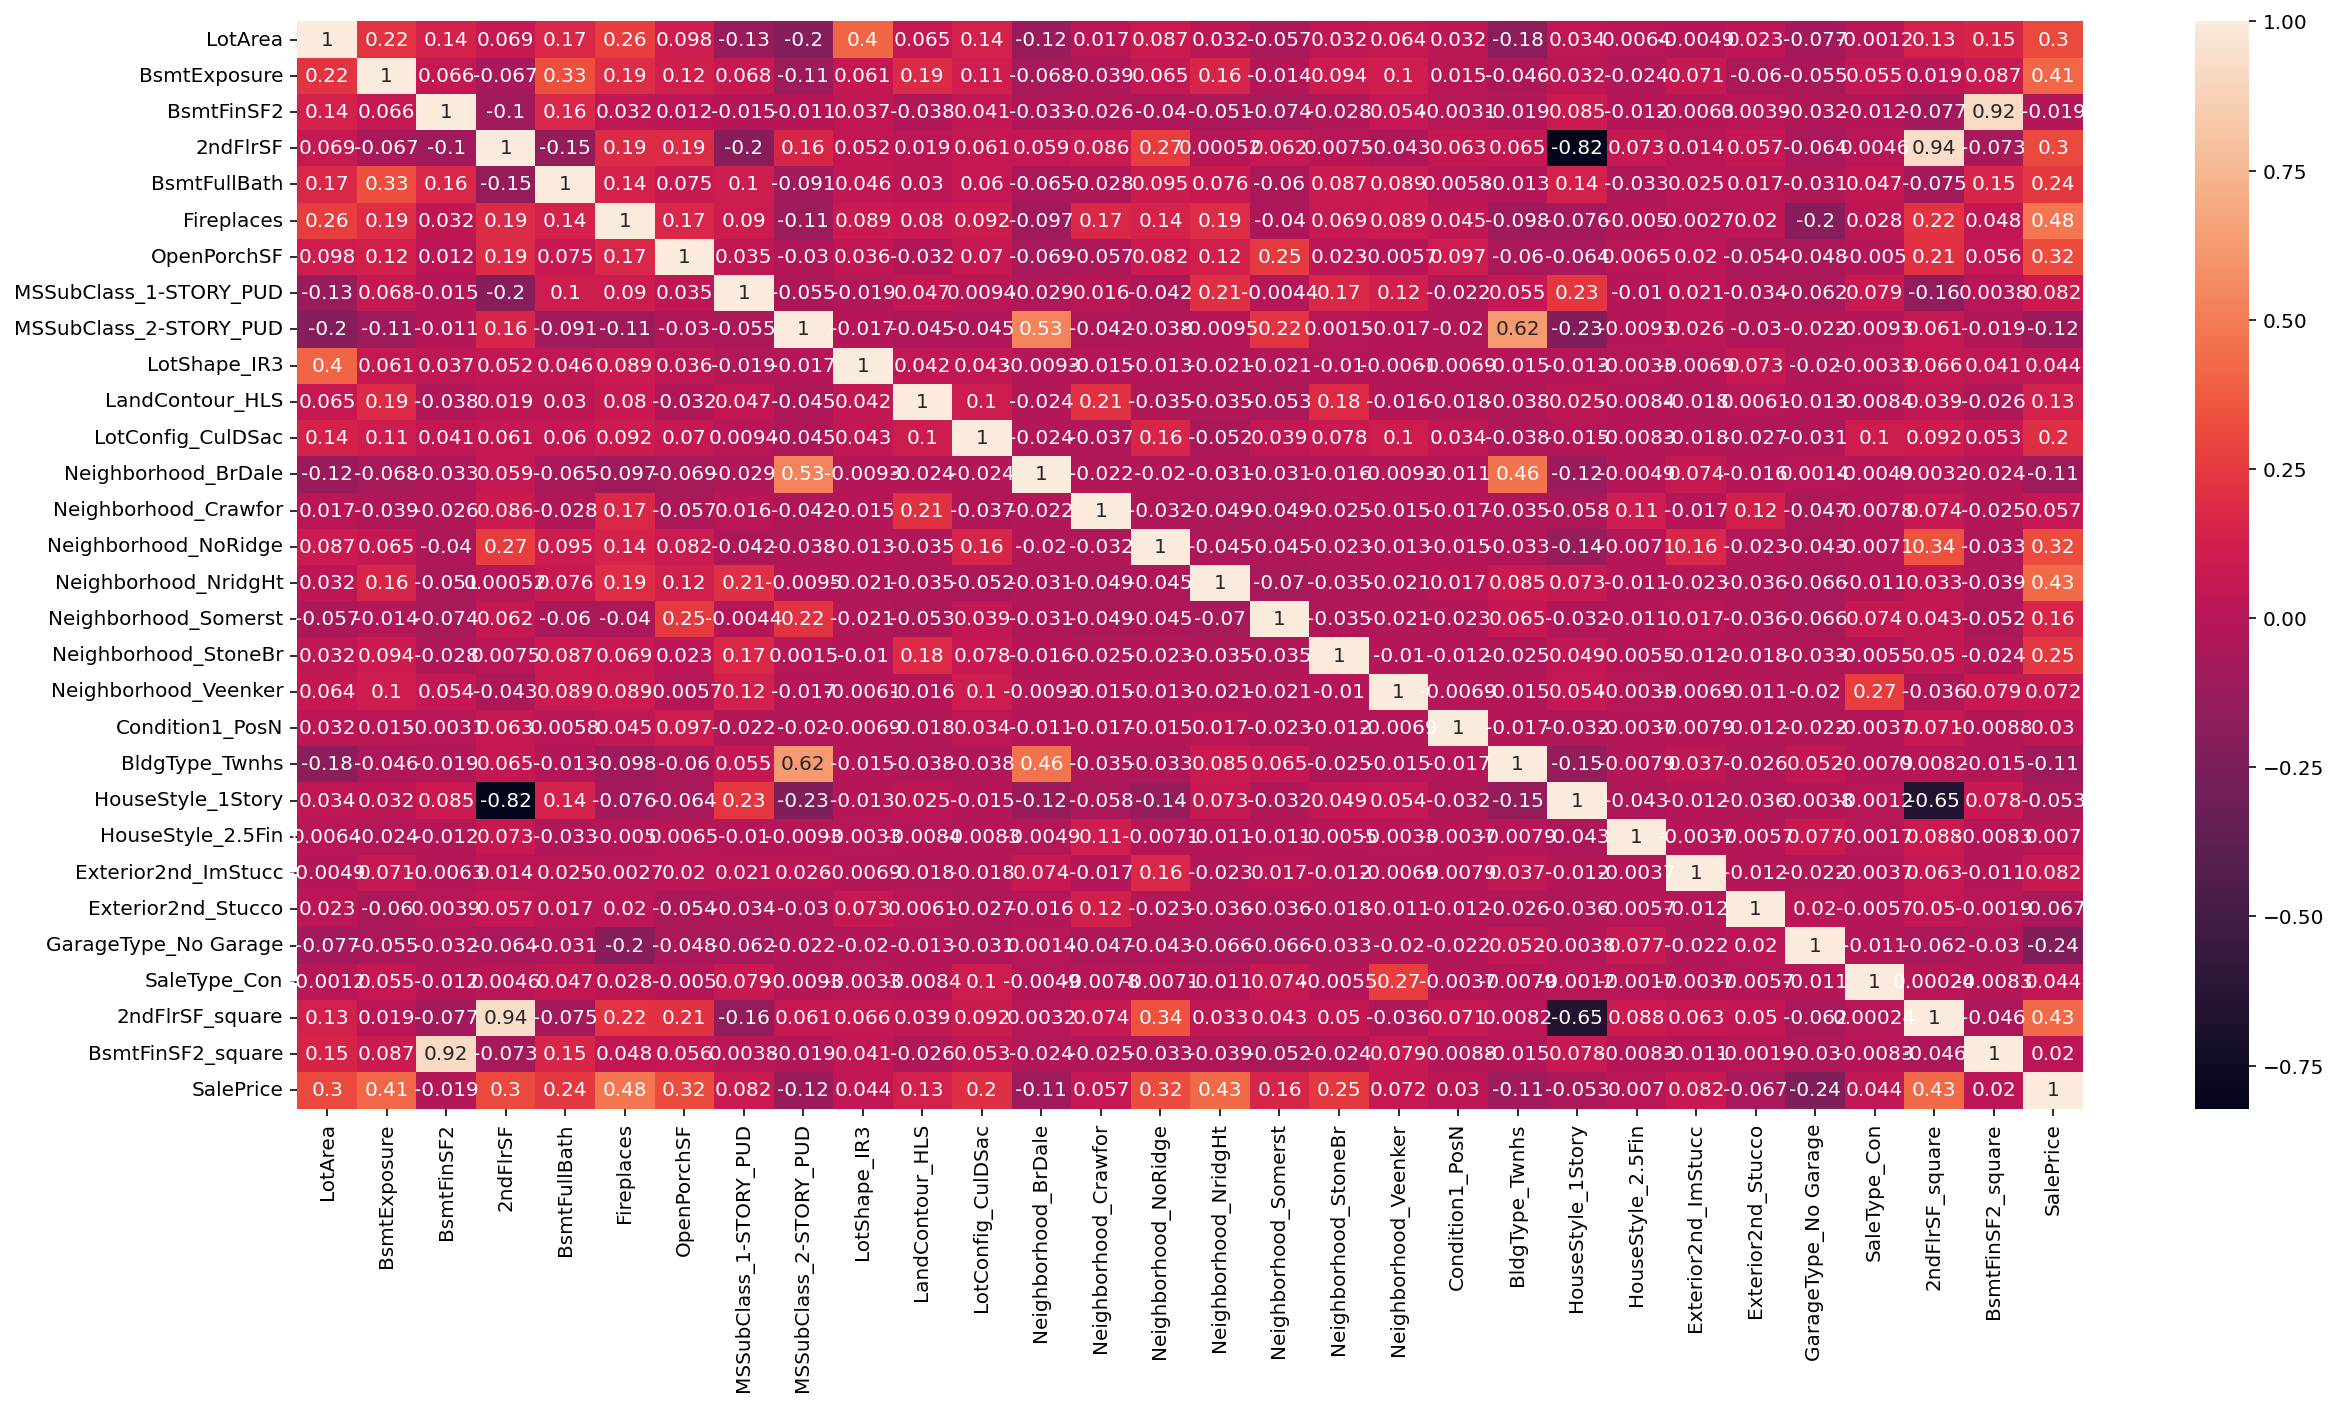

In [45]:
# Heatmap of correlation
features.append('SalePrice')
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(data[features].corr(),annot=True)
features.remove('SalePrice')

The optimal lambda for Lasso is 0.00001. It is not the optimal for the training set, but it is for the test set That is the reason $\lambda = 0.00001$ is the chosen one.

After selecting just 5 variables which are: FirePlaces, Neighborhood\_NridgHt, 2ndFlr\_square, BsmtExposure, OpenPorchSF



# Solving Problem Statement Part II

Calculate the Ridge and Lasso with double Lambda value



In [46]:
ridgereg = Ridge(alpha = 0.2) # Initialize the Ridge Regression model with a specific lambda
ridgereg.fit(X_train[features], y_train) # fit the model on the polynomial features


    #Computing the r2 score
print(i)
y_pred = ridgereg.predict(X_train[features])
print("r2 score train = " + str(r2_score(y_train, y_pred))) 
print(ridgereg.coef_) # model coefficients

y_test_pred = ridgereg.predict(X_test[features])
print("r2 score test = " + str(r2_score(y_test, y_test_pred))) 
print(ridgereg.coef_) # model coefficients

100
r2 score train = 0.7096595760506534
[ 0.20066086  0.10295632  0.00503561  0.16148441  0.07377896  0.1155477
  0.04941754 -0.0053379  -0.02215114 -0.06280861  0.02597756  0.04703419
  0.01066491  0.03827804  0.11222456  0.16405917  0.10102787  0.13500927
  0.03824684 -0.01584373 -0.03587175  0.05592756  0.01186116  0.02439369
 -0.05137796 -0.07868098 -0.00580306  0.12854637  0.02945597]
r2 score test = 0.6944499723167701
[ 0.20066086  0.10295632  0.00503561  0.16148441  0.07377896  0.1155477
  0.04941754 -0.0053379  -0.02215114 -0.06280861  0.02597756  0.04703419
  0.01066491  0.03827804  0.11222456  0.16405917  0.10102787  0.13500927
  0.03824684 -0.01584373 -0.03587175  0.05592756  0.01186116  0.02439369
 -0.05137796 -0.07868098 -0.00580306  0.12854637  0.02945597]


In [48]:
lassoreg = Lasso(alpha = 0.00002)
lassoreg.fit(X_train[features], y_train) # fit the model on the polynomial features
   
    
    #Computing the r2 score
print(i)
y_pred = lassoreg.predict(X_train[features])
print("r2 score train = " + str(r2_score(y_train, y_pred))) 
print(lassoreg.coef_) # model coefficients
    
y_test_pred = lassoreg.predict(X_test[features])
print("r2 score test = " + str(r2_score(y_test, y_test_pred))) 
print(lassoreg.coef_) # model coefficients

100
r2 score train = 0.7099147083132833
[ 0.26624044  0.10234476  0.00488531  0.16191234  0.07292003  0.11408805
  0.04668716 -0.00313024 -0.02008933 -0.06551105  0.02527676  0.04542961
  0.00838537  0.038292    0.11222387  0.16411214  0.10125902  0.13528538
  0.03360872 -0.01411006 -0.03469219  0.05565153  0.          0.02167809
 -0.05161466 -0.07833006 -0.          0.12639648  0.02736136]
r2 score test = 0.6937741625847809
[ 0.26624044  0.10234476  0.00488531  0.16191234  0.07292003  0.11408805
  0.04668716 -0.00313024 -0.02008933 -0.06551105  0.02527676  0.04542961
  0.00838537  0.038292    0.11222387  0.16411214  0.10125902  0.13528538
  0.03360872 -0.01411006 -0.03469219  0.05565153  0.          0.02167809
 -0.05161466 -0.07833006 -0.          0.12639648  0.02736136]


In [50]:
X = df.drop(['SalePrice','Fireplaces', 'Neighborhood_NridgHt', 'BsmtExposure', 'OpenPorchSF', 'Neighborhood_NoRidge'],axis=1)
y = df['SalePrice']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=13)

In [51]:
rfe = RFE(lm,n_features_to_select=45)
rfe = rfe.fit(X_train,y_train)
col_selection = list(zip(X_train.columns,rfe.support_,rfe.ranking_))

new_features = []
for i in col_selection:
    if i[1] == True:
        new_features.append(i[0])

vif = pd.DataFrame()
vif['features'] = new_features
vif["VIF"] = [variance_inflation_factor(X_train[new_features].values,i) for i in range(X_train[new_features].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


features    VIF
13     MSSubClass_1-STORY_PUD    inf
14     MSSubClass_2-STORY_PUD    inf
35             BldgType_Twnhs    inf
36            BldgType_TwnhsE    inf
38         Exterior1st_CBlock    inf
39         Exterior2nd_CBlock    inf
16  MSSubClass_PUD-MULTILEVEL    inf
15          MSSubClass_DUPLEX    inf
34            BldgType_Duplex    inf
5                  BsmtFinSF2    inf
7                 TotalBsmtSF    inf
6                   BsmtUnfSF    inf
4                  BsmtFinSF1    inf
1                 OverallQual  57.51
12                 GarageQual  50.39
3                    BsmtQual  48.09
10                 GarageCars  38.66
11                 GarageArea  33.59
8                    1stFlrSF  31.01
2                   ExterQual  20.21
0                     LotArea   6.17
42       GarageType_No Garage   3.80
25         Neighborhood_NAmes   3.07
9                    2ndFlrSF   2.84
21       Neighborhood_Edwards   1.82
20       Neighborhood_CollgCr   1.79
27       Neighborhood_OldTown   1.79
22       Neighborhood_Gilbert   1.51
29        Neighborhood_Sawyer   1.46
23        Neighborhood_IDOTRR   1.44
18       Neighborhood_BrkSide   1.42
26        Neighborhood_NWAmes   1.38
24       Neighborhood_Mitchel   1.38
32       Neighborhood_Veenker   1.34
30       Neighborhood_SawyerW   1.31
43               SaleType_Con   1.29
31        Neighborhood_Timber   1.22
19       Neighborhood_ClearCr   1.21
28         Neighborhood_SWISU   1.21
17               LotShape_IR3   1.18
44             SaleType_ConLI   1.08
33            Condition1_PosN   1.07
37          HouseStyle_2.5Fin   1.06
40        Exterior2nd_ImStucc   1.05
41            Foundation_Wood   1.05

In [52]:
for i in vif[vif['VIF']>50]['features']:
    new_features.remove(i)
    
vif = pd.DataFrame()
vif['features'] = new_features
vif["VIF"] = [variance_inflation_factor(X_train[new_features].values,i) for i in range(X_train[new_features].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

features    VIF
5             GarageCars  35.59
6             GarageArea  31.74
2               BsmtQual  18.66
1              ExterQual  15.60
3               1stFlrSF  12.51
0                LotArea   5.56
4               2ndFlrSF   2.29
27  GarageType_No Garage   1.65
15    Neighborhood_NAmes   1.51
10  Neighborhood_CollgCr   1.42
12  Neighborhood_Gilbert   1.33
22  Neighborhood_Veenker   1.31
11  Neighborhood_Edwards   1.28
28          SaleType_Con   1.26
16   Neighborhood_NWAmes   1.19
17  Neighborhood_OldTown   1.19
9   Neighborhood_ClearCr   1.18
21   Neighborhood_Timber   1.16
19   Neighborhood_Sawyer   1.16
14  Neighborhood_Mitchel   1.16
13   Neighborhood_IDOTRR   1.15
20  Neighborhood_SawyerW   1.13
7           LotShape_IR3   1.12
8   Neighborhood_BrkSide   1.09
18    Neighborhood_SWISU   1.07
23       Condition1_PosN   1.06
29        SaleType_ConLI   1.05
26       Foundation_Wood   1.04
25   Exterior2nd_ImStucc   1.03
24     HouseStyle_2.5Fin   1.02

In [53]:
for i in vif[vif['VIF']>15]['features']:
    new_features.remove(i)
    
vif = pd.DataFrame()
vif['features'] = new_features
vif["VIF"] = [variance_inflation_factor(X_train[new_features].values,i) for i in range(X_train[new_features].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

features   VIF
0                LotArea  5.34
1               1stFlrSF  4.47
2               2ndFlrSF  1.65
11    Neighborhood_NAmes  1.42
18  Neighborhood_Veenker  1.31
24          SaleType_Con  1.26
6   Neighborhood_CollgCr  1.25
7   Neighborhood_Edwards  1.24
8   Neighborhood_Gilbert  1.19
23  GarageType_No Garage  1.17
5   Neighborhood_ClearCr  1.17
13  Neighborhood_OldTown  1.15
12   Neighborhood_NWAmes  1.13
17   Neighborhood_Timber  1.13
10  Neighborhood_Mitchel  1.12
15   Neighborhood_Sawyer  1.12
16  Neighborhood_SawyerW  1.11
3           LotShape_IR3  1.10
9    Neighborhood_IDOTRR  1.09
4   Neighborhood_BrkSide  1.06
14    Neighborhood_SWISU  1.05
19       Condition1_PosN  1.05
22       Foundation_Wood  1.04
25        SaleType_ConLI  1.04
21   Exterior2nd_ImStucc  1.03
20     HouseStyle_2.5Fin  1.01

In [54]:
for i in vif[vif['VIF']>5]['features']:
    new_features.remove(i)
    
vif = pd.DataFrame()
vif['features'] = new_features
vif["VIF"] = [variance_inflation_factor(X_train[new_features].values,i) for i in range(X_train[new_features].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF",ascending=False)
vif

features   VIF
0               1stFlrSF  2.59
1               2ndFlrSF  1.49
10    Neighborhood_NAmes  1.36
17  Neighborhood_Veenker  1.27
23          SaleType_Con  1.25
5   Neighborhood_CollgCr  1.23
6   Neighborhood_Edwards  1.21
22  GarageType_No Garage  1.17
7   Neighborhood_Gilbert  1.16
12  Neighborhood_OldTown  1.15
11   Neighborhood_NWAmes  1.12
15  Neighborhood_SawyerW  1.11
9   Neighborhood_Mitchel  1.10
16   Neighborhood_Timber  1.10
14   Neighborhood_Sawyer  1.09
8    Neighborhood_IDOTRR  1.08
2           LotShape_IR3  1.07
13    Neighborhood_SWISU  1.05
18       Condition1_PosN  1.05
3   Neighborhood_BrkSide  1.05
4   Neighborhood_ClearCr  1.04
21       Foundation_Wood  1.04
24        SaleType_ConLI  1.04
20   Exterior2nd_ImStucc  1.03
19     HouseStyle_2.5Fin  1.01

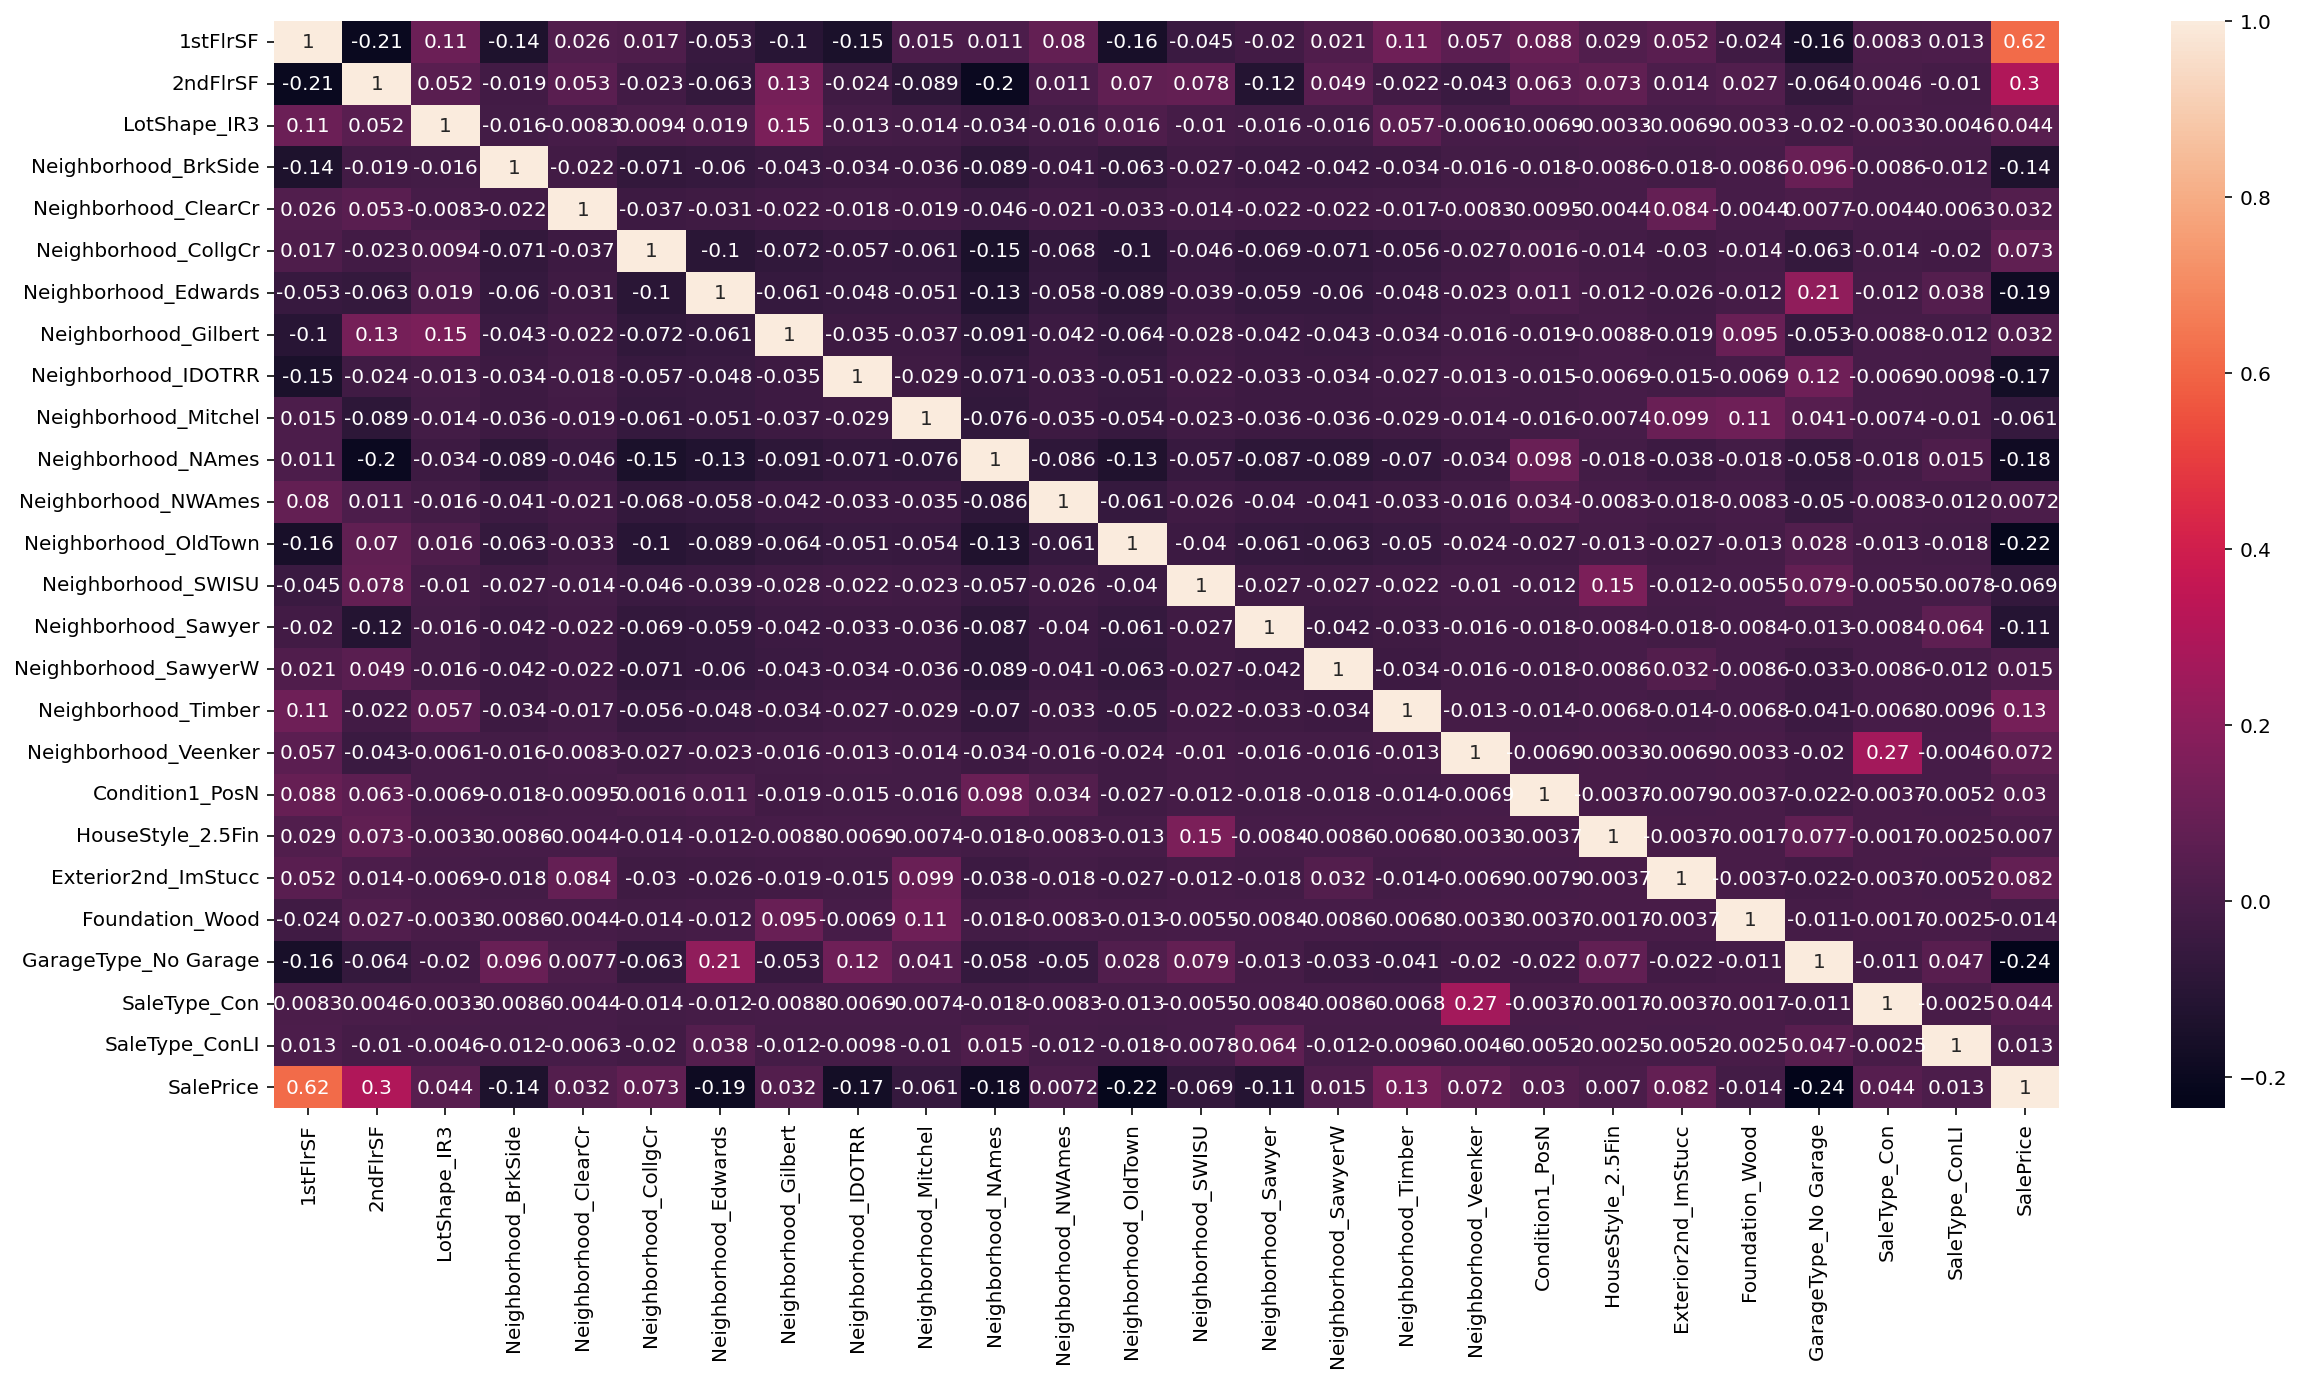

In [55]:
new_features.append('SalePrice')
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(df[new_features].corr(),annot=True)
new_features.remove('SalePrice')

The features to be selected will be 1stFlrSF, 2ndFlrSF, GarageType\_No Garage, Neighborhood\_OldTown, Neighborhood\_Edwards



In [22]:
folds = KFold(n_splits=5,shuffle=True,random_state=13)
hyper = [{'n_features_to_select':list(range(1,15))}]
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm)
model_cv = GridSearchCV(estimator=rfe, param_grid=hyper,scoring='r2',verbose=1,return_train_score=True)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14]}],
             return_train_score=True, scoring='r2', verbose=1)

In [25]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['params','mean_test_score','mean_train_score']]

params  mean_test_score  mean_train_score
0    {'n_features_to_select': 1}         0.281426          0.517488
1    {'n_features_to_select': 2}         0.374482          0.658495
2    {'n_features_to_select': 3}         0.477234          0.703655
3    {'n_features_to_select': 4}         0.464152          0.718082
4    {'n_features_to_select': 5}         0.496340          0.765473
5    {'n_features_to_select': 6}         0.464462          0.778306
6    {'n_features_to_select': 7}         0.446114          0.787831
7    {'n_features_to_select': 8}         0.455872          0.807495
8    {'n_features_to_select': 9}         0.438583          0.809247
9   {'n_features_to_select': 10}         0.430806          0.809974
10  {'n_features_to_select': 11}         0.440699          0.812114
11  {'n_features_to_select': 12}         0.433875          0.813609
12  {'n_features_to_select': 13}         0.439347          0.815623
13  {'n_features_to_select': 14}         0.435311          0.816466